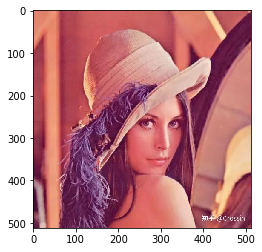

(512, 512, 3)


In [3]:
from PIL import Image 
from matplotlib import pyplot as plt 
import numpy as np
import math
img = Image.open('lena.jpg')
plt.imshow(img)
plt.show()
img = np.asarray(img)
print(img.shape)

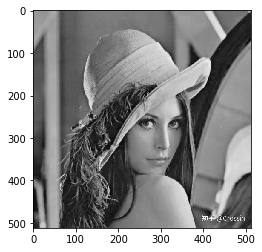

In [4]:
#先轉灰階
gray = np.dot(img[:,:,0:3],[0.299,0.587,0.114])
gray = gray.astype('uint8')
plt.imshow(gray,cmap='gray')
plt.show()


## Nearest-neighbor interpolation 最近相鄰插值法 
## 效果通常不好 會有點鋸齒狀出現 但是很易懂

In [5]:
#Nearest-neighbor interpolation 最近相鄰插值法 假設我們從512*512 放大到 1024*1024
def Nearest_neighbor(img,dest_w,dest_h):
    dest = np.zeros((dest_w,dest_h))
    
    scale_x = dest_w/img.shape[1]
    scale_y = dest_h/img.shape[0]
    
    for i in range(dest_h):
        for j in range(dest_w):
            src_x = math.floor(i/scale_x)
            src_y = math.floor(j/scale_y)
            dest[i,j] = img[src_x,src_y]
    dest.astype('uint8')
    return dest

    

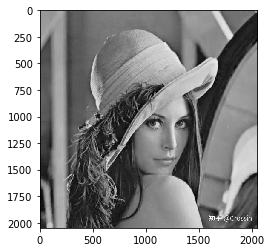

(2048, 2048)


In [6]:
nearest = Nearest_neighbor(gray,2048,2048)
plt.imshow(nearest,cmap='gray')
plt.show()
print(nearest.shape)
nearest = Image.fromarray(nearest)
nearest = nearest.convert('L')
nearest.save('nearest.jpg')

## Bilinear Interpolation 雙線性插值
### 狗幹難....

In [24]:
def Bilinear_inter(gray,dest_w,dest_h):
    dest = np.zeros((dest_w,dest_h))
    dest.astype('uint8')
    scale_x = gray.shape[1]/dest_w
    scale_y = gray.shape[0]/dest_h
    for i in range(dest_h):
        for j in range(dest_w):
            #先找出該原點的左上跟右下(等同正方形都找到)
            #src_x = (dst_x + 0.5) * scale_x - 0.5 (幾何中心對稱)
            ori_x = ((i+0.5)*scale_x-0.5)
            ori_y = ((j+0.5)*scale_y-0.5)
            
            Left_up_x = int(math.floor(ori_x))
            Left_up_y = int(math.floor(ori_y))
            
            Right_down_x = min(Left_up_x+1,gray.shape[1]-1)
            Right_down_y = min(Left_up_y+1,gray.shape[0]-1)
            
            #先做一次水平內插
            horizon_down = gray[Left_up_x,Right_down_y]*(Right_down_x-ori_x)+gray[Right_down_x,Right_down_y]*(ori_x-Left_up_x)
            horizon_up = gray[Left_up_x,Left_up_y]*(Right_down_x-ori_x)+gray[Right_down_x,Left_up_y]*(ori_x-Left_up_x)
            
            #用第一次求出的結果做垂直內插
            ans = horizon_up*(Right_down_y-ori_y)+horizon_down*(ori_y-Left_up_y)
            dest[i,j] = int(ans)
    return dest

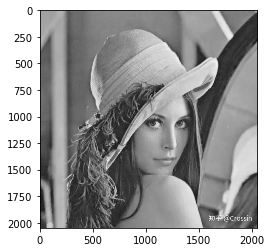

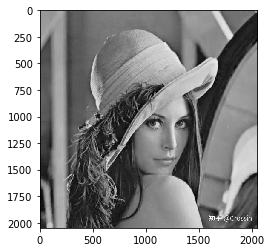

In [27]:
Bilinear = Bilinear_inter(gray,2048,2048)
plt.imshow(Bilinear,cmap='gray')
plt.show()
plt.imshow(nearest,'gray')